Group 4 - CV 2 May 22 A

**• DOMAIN:** Automotive Surveillance.

**• CONTEXT:**
Computer vision can be used to automate supervision and generate action appropriate action trigger if the event is predicted from the image of interest. For example a car moving on the road can be easily identified by a camera as make of the car, type, colour, number plates etc.

**• DATA DESCRIPTION:**
The Cars dataset contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g. 2012 Tesla Model S or 2012 BMW M3 coupe.

‣ Train Images: Consists of real images of cars as per the make and year of the car.

‣ Test Images: Consists of real images of cars as per the make and year of the car.

‣ Train Annotation: Consists of bounding box region for training images.

‣ Test Annotation: Consists of bounding box region for testing images.
Dataset has been attached along with this project. Please use the same for this capstone project.

Original link to the dataset for your reference only: https://www.kaggle.com/jutrera/stanford-car-dataset-by-classes-folder [ for your
reference only ]

Reference: 3D Object Representations for Fine-Grained Categorisation, Jonathan Krause, Michael Stark, Jia Deng, Li Fei-Fei 4th IEEE Workshop on 3D Representation and Recognition, at ICCV 2013 (3dRR-13). Sydney, Australia. Dec. 8, 2013.

**• PROJECT OBJECTIVE:** Design a DL based car identification model.

**• PROJECT TASK:** [ Score: 100 points]

### 1. Milestone 1: [ Score: 40 points]


#### Input: Context and Dataset
#### Process:


### Step 1: Import the data. [ 3 points ]


Let us map the google drive and get the path

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


assign the image folder path

In [2]:
images_zip_path = '/content/drive/MyDrive/GreatLearning/capstone/Car+Images.zip'

Extract the files from zip folder

In [3]:
from zipfile import ZipFile

with ZipFile(images_zip_path, 'r') as z:
  z.extractall()

Get the total number of training and testing Classes(folders indicating type of car and print the total

In [4]:
import os

path = "/content/Car Images/Train Images"  # replace with your directory path
test_folders = len([f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))])
print("Number of Train folders:", test_folders)


Number of Train folders: 196


In [5]:
path = "/content/Car Images/Test Images"  # replace with your directory path
train_folders = len([f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))])
print("Number of Test folders:", train_folders)


Number of Test folders: 196


### Inference : We have downloaded the files, created test and train folder. Clearly there are 196 different classes in both train and test dataset

### Step 2: Map training and testing images to its classes. [ 6 points ]


Let us now see how many images are there in total in both test and train folders

In [6]:
import os

train_dir = "/content/Car Images/Train Images"
test_dir = "/content/Car Images/Test Images"

# Get list of all subdirectories in train directory
train_classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

# Get list of all subdirectories in test directory
test_classes = [d for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d))]

# Get list of all image files in train and test directories
train_images = []
test_images = []

for c in train_classes:
    images = [os.path.join(train_dir, c, f) for f in os.listdir(os.path.join(train_dir, c)) if f.endswith('.jpg')]
    train_images.extend(images)

for c in test_classes:
    images = [os.path.join(test_dir, c, f) for f in os.listdir(os.path.join(test_dir, c)) if f.endswith('.jpg')]
    test_images.extend(images)

print("Number of training images:", len(train_images))
print("Number of testing images:", len(test_images))


Number of training images: 8144
Number of testing images: 8041


In [7]:
train_images

['/content/Car Images/Train Images/Hyundai Azera Sedan 2012/07324.jpg',
 '/content/Car Images/Train Images/Hyundai Azera Sedan 2012/01204.jpg',
 '/content/Car Images/Train Images/Hyundai Azera Sedan 2012/07078.jpg',
 '/content/Car Images/Train Images/Hyundai Azera Sedan 2012/06474.jpg',
 '/content/Car Images/Train Images/Hyundai Azera Sedan 2012/07760.jpg',
 '/content/Car Images/Train Images/Hyundai Azera Sedan 2012/02397.jpg',
 '/content/Car Images/Train Images/Hyundai Azera Sedan 2012/00145.jpg',
 '/content/Car Images/Train Images/Hyundai Azera Sedan 2012/05019.jpg',
 '/content/Car Images/Train Images/Hyundai Azera Sedan 2012/04807.jpg',
 '/content/Car Images/Train Images/Hyundai Azera Sedan 2012/00687.jpg',
 '/content/Car Images/Train Images/Hyundai Azera Sedan 2012/00472.jpg',
 '/content/Car Images/Train Images/Hyundai Azera Sedan 2012/03277.jpg',
 '/content/Car Images/Train Images/Hyundai Azera Sedan 2012/07330.jpg',
 '/content/Car Images/Train Images/Hyundai Azera Sedan 2012/0734

Let use annotation data and assign them to correct images based on image name and mapping

In [8]:
annotations_path = "/content/drive/MyDrive/GreatLearning/capstone/Annotations.zip"

In [9]:
from zipfile import ZipFile

with ZipFile(annotations_path, 'r') as z:
  z.extractall()

In [10]:
import pandas as pd

# Load the annotation files
train_annotation = pd.read_csv("/content/Annotations/Train Annotations.csv", header=None, skiprows=1)
test_annotation = pd.read_csv("/content/Annotations/Test Annotation.csv", header=None, skiprows=1)

# Set the column names for the annotations
train_annotation.columns = ["Image Name", "a", "b", "c", "d", "Image class"]
test_annotation.columns = ["Image Name", "a", "b", "c", "d", "Image class"]

# Create dictionaries to map the images to their respective annotations
train_dict = {}
for index, row in train_annotation.iterrows():
    if row["Image Name"] not in train_dict:
        train_dict[row["Image Name"]] = []
    train_dict[row["Image Name"]].append([int(row[1])] + row[2:5].tolist())

test_dict = {}
for index, row in test_annotation.iterrows():
    if row["Image Name"] not in test_dict:
        test_dict[row["Image Name"]] = []
    test_dict[row["Image Name"]].append([int(row[1])] + row[2:5].tolist())

# Create dictionaries to map the images to their respective classes
train_classes = {}
for index, row in train_annotation.iterrows():
    train_classes[row["Image Name"]] = row["Image class"]

test_classes = {}
for index, row in test_annotation.iterrows():
    test_classes[row["Image Name"]] = row["Image class"]


In [11]:
train_classes

{'00001.jpg': 14,
 '00002.jpg': 3,
 '00003.jpg': 91,
 '00004.jpg': 134,
 '00005.jpg': 106,
 '00006.jpg': 123,
 '00007.jpg': 89,
 '00008.jpg': 96,
 '00009.jpg': 167,
 '00010.jpg': 58,
 '00011.jpg': 49,
 '00012.jpg': 186,
 '00013.jpg': 135,
 '00014.jpg': 85,
 '00015.jpg': 193,
 '00016.jpg': 172,
 '00017.jpg': 14,
 '00018.jpg': 73,
 '00019.jpg': 192,
 '00020.jpg': 57,
 '00021.jpg': 79,
 '00022.jpg': 36,
 '00023.jpg': 120,
 '00024.jpg': 170,
 '00025.jpg': 194,
 '00026.jpg': 134,
 '00027.jpg': 184,
 '00028.jpg': 86,
 '00029.jpg': 180,
 '00030.jpg': 194,
 '00031.jpg': 154,
 '00032.jpg': 139,
 '00033.jpg': 66,
 '00034.jpg': 133,
 '00035.jpg': 154,
 '00036.jpg': 104,
 '00037.jpg': 38,
 '00038.jpg': 97,
 '00039.jpg': 105,
 '00040.jpg': 142,
 '00041.jpg': 13,
 '00042.jpg': 191,
 '00043.jpg': 119,
 '00044.jpg': 38,
 '00045.jpg': 186,
 '00046.jpg': 25,
 '00047.jpg': 194,
 '00048.jpg': 177,
 '00049.jpg': 173,
 '00050.jpg': 42,
 '00051.jpg': 91,
 '00052.jpg': 148,
 '00053.jpg': 15,
 '00054.jpg': 97,

### Inference : As we can see there are 8144 training and 8041 test images.

### Step 3: Map training and testing images to its annotations. [ 6 points ]


In [12]:
import pandas as pd

# Load the annotation files
#train_annotation = pd.read_csv("Annotations/Train Annotations.csv", header=None, skiprows=1)
#test_annotation = pd.read_csv("Annotations/Test Annotation.csv", header=None, skiprows=1)

# Set the column names for the annotations
train_annotation.columns = ["Image Name", "a", "b", "c", "d", "Image class"]
test_annotation.columns = ["Image Name", "a", "b", "c", "d", "Image class"]

# Create dictionaries to map the images to their respective annotations
train_dict = {}
for index, row in train_annotation.iterrows():
    if row["Image Name"] not in train_dict:
        train_dict[row["Image Name"]] = []
    train_dict[row["Image Name"]].append([int(row[1])] + row[2:5].tolist())

test_dict = {}
for index, row in test_annotation.iterrows():
    if row["Image Name"] not in test_dict:
        test_dict[row["Image Name"]] = []
    test_dict[row["Image Name"]].append([int(row[1])] + row[2:5].tolist())

# Remove the header from the dictionary keys
train_dict = {k:v for k,v in train_dict.items() if k != "Image Name"}
test_dict = {k:v for k,v in test_dict.items() if k != "Image Name"}


In [13]:
train_dict

{'00001.jpg': [[39, 116, 569, 375]],
 '00002.jpg': [[36, 116, 868, 587]],
 '00003.jpg': [[85, 109, 601, 381]],
 '00004.jpg': [[621, 393, 1484, 1096]],
 '00005.jpg': [[14, 36, 133, 99]],
 '00006.jpg': [[259, 289, 515, 416]],
 '00007.jpg': [[88, 80, 541, 397]],
 '00008.jpg': [[73, 79, 591, 410]],
 '00009.jpg': [[20, 126, 1269, 771]],
 '00010.jpg': [[21, 110, 623, 367]],
 '00011.jpg': [[51, 93, 601, 393]],
 '00012.jpg': [[6, 62, 499, 286]],
 '00013.jpg': [[30, 36, 418, 307]],
 '00014.jpg': [[31, 246, 778, 540]],
 '00015.jpg': [[32, 77, 589, 379]],
 '00016.jpg': [[27, 49, 611, 396]],
 '00017.jpg': [[39, 52, 233, 150]],
 '00018.jpg': [[3, 8, 190, 147]],
 '00019.jpg': [[247, 287, 1366, 761]],
 '00020.jpg': [[17, 281, 961, 596]],
 '00021.jpg': [[17, 156, 695, 375]],
 '00022.jpg': [[212, 538, 1893, 1131]],
 '00023.jpg': [[11, 28, 476, 234]],
 '00024.jpg': [[53, 126, 973, 621]],
 '00025.jpg': [[34, 87, 567, 343]],
 '00026.jpg': [[30, 174, 598, 379]],
 '00027.jpg': [[80, 107, 606, 336]],
 '00028

### Inference : We have mapped the image names to that of their bouding boxes

### Step 4: Display images with bounding box. [ 5 points ]


In [14]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

def display_images(image_names, bbox_dict, directory_path):
    fig, ax = plt.subplots(1, 5, figsize=(20, 4))
    for i, image_name in enumerate(image_names):
        for root, dirs, files in os.walk(directory_path):
            if image_name in files:
                image_path = os.path.join(root, image_name)
                image = cv2.imread(image_path)
                bboxes = bbox_dict[image_name]
                for bbox in bboxes:
                    label, x1, y1, x2, y2 = [image_name] + bbox
                    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), thickness=3)
                    cv2.putText(image, str(label), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                    #cv2.imwrite(image_path, image)
                ax[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                ax[i].set_title(image_name)
    plt.show()


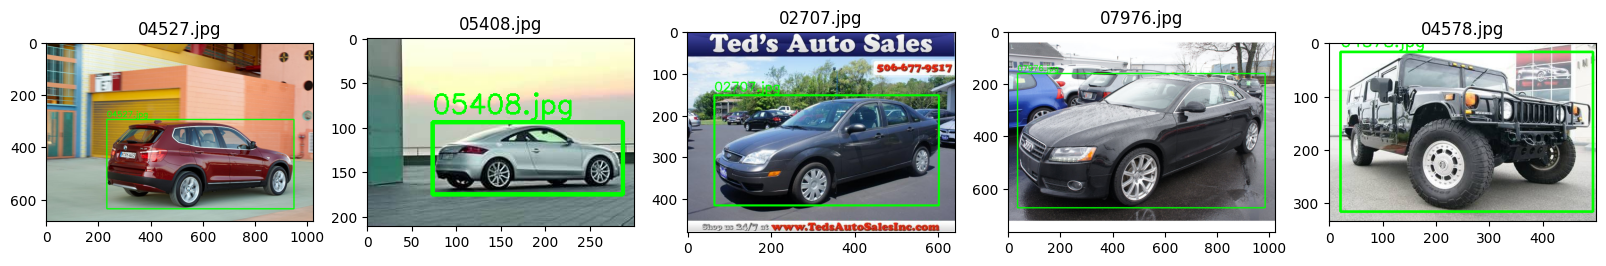

In [15]:
# Example usage Train Images
random_images = random.sample(list(train_dict.keys()), 5)
display_images(random_images, train_dict, "/content/Car Images/Train Images")


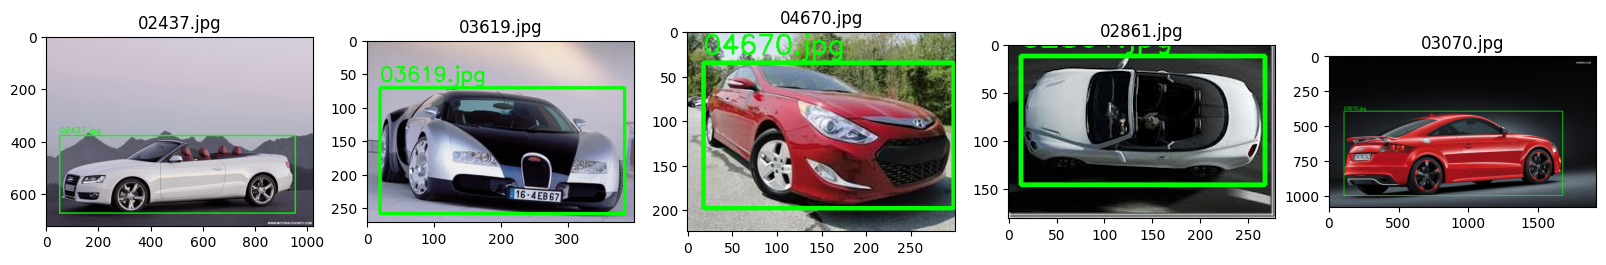

In [16]:
# Example usage Test Images
random_images = random.sample(list(test_dict.keys()), 5)
display_images(random_images, test_dict, "/content/Car Images/Test Images")


### Inference : Clearly, we can see that bouding boxes are correctly mapped to the image names and image names are also printed as labels

# EDA
### Before buliding a model, let us do some exploratory data analysis on the given dataset

#### Let us create a dataframe and assign the train images so we can perform some EDA easily and let us do this for TEST data first

In [17]:
path = "/content/Car Images/Train Images"

pd.set_option('display.max_colwidth', None)
df = pd.DataFrame(columns=['Car Class', 'Count', 'Full Path'])

count = 0
for f in os.listdir(path):
   #print(f)
   newPath = os.path.join(path, f)
   if os.path.isdir(newPath):
    images = os.listdir(newPath) # your directory path
    number_files = len(images)
    df = pd.concat([df, pd.DataFrame.from_records([
                {'Car Class' : os.path.basename(newPath), 
                'Count' : len(images), 
                'Full Path' : newPath
                }])])

In [18]:
df.head()

Car Class Count  \
0                            Hyundai Azera Sedan 2012    42   
0                         Ford Expedition EL SUV 2009    45   
0                         Chevrolet Impala Sedan 2007    43   
0  Chevrolet Silverado 1500 Classic Extended Cab 2007    43   
0                    Hyundai Sonata Hybrid Sedan 2012    34   

                                                                             Full Path  
0                            /content/Car Images/Train Images/Hyundai Azera Sedan 2012  
0                         /content/Car Images/Train Images/Ford Expedition EL SUV 2009  
0                         /content/Car Images/Train Images/Chevrolet Impala Sedan 2007  
0  /content/Car Images/Train Images/Chevrolet Silverado 1500 Classic Extended Cab 2007  
0                    /content/Car Images/Train Images/Hyundai Sonata Hybrid Sedan 2012

#### Let us extract the first word that indicates the company name from the column Car Class

In [19]:
df['Car Company'] = pd.DataFrame(df['Car Class'].str.rsplit(' ', 0).str[0])

<ipython-input-19-6f6fed9f7fe4>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df['Car Company'] = pd.DataFrame(df['Car Class'].str.rsplit(' ', 0).str[0])


In [20]:
df.head(5)

Car Class Count  \
0                            Hyundai Azera Sedan 2012    42   
0                         Ford Expedition EL SUV 2009    45   
0                         Chevrolet Impala Sedan 2007    43   
0  Chevrolet Silverado 1500 Classic Extended Cab 2007    43   
0                    Hyundai Sonata Hybrid Sedan 2012    34   

                                                                             Full Path  \
0                            /content/Car Images/Train Images/Hyundai Azera Sedan 2012   
0                         /content/Car Images/Train Images/Ford Expedition EL SUV 2009   
0                         /content/Car Images/Train Images/Chevrolet Impala Sedan 2007   
0  /content/Car Images/Train Images/Chevrolet Silverado 1500 Classic Extended Cab 2007   
0                    /content/Car Images/Train Images/Hyundai Sonata Hybrid Sedan 2012   

  Car Company  
0     Hyundai  
0        Ford  
0   Chevrolet  
0   Chevrolet  
0     Hyundai

#### Let us group the dataframe by Car Name and get the total by Car Company

In [21]:
df_temp = df.groupby(['Car Company'])['Count'].transform('sum')

In [22]:
df['Total'] = df.groupby('Car Company', sort= True)['Count'].transform('sum')

In [23]:
df.sort_values('Total', ascending = False, inplace = True)

In [24]:
df1 = df.groupby('Car Company', as_index=False)['Count'].sum().sort_values(by='Count', ascending=False)

In [25]:
df1.describe()

Count
count   49.000000
mean   166.204082
std    185.873947
min     29.000000
25%     44.000000
50%     88.000000
75%    171.000000
max    905.000000

### Inference : We can see that there are about 49 different companies which makes car. On an average, each company has 166 cars with 905 being maximum and a company making just about 29 cars. More than 75% of these companies have 171 cars. There is some imbance in classes data due the large number of cars available by one single company with 905 cars and a company with just 29 cars. But, for this project we shall not balance this data.

#### Let us see the top 10 Car Companies from the given data

In [26]:
df_temp = df.groupby('Car Company', as_index=False)['Count'].sum().sort_values(by='Count', ascending=False).head(10)

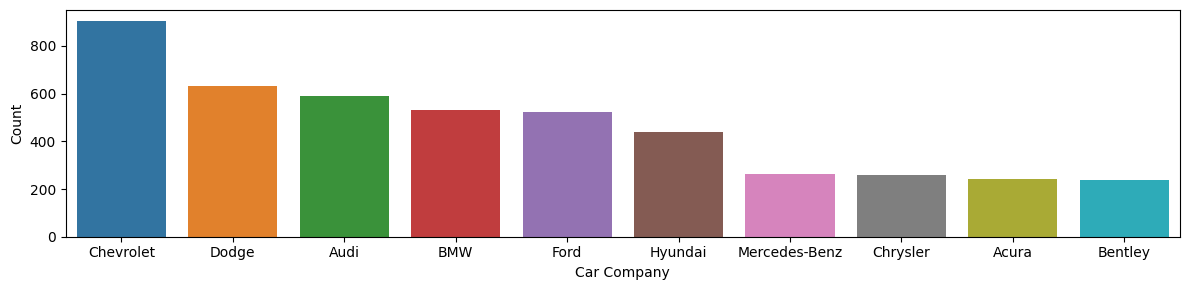

In [27]:
import seaborn as sns

plt.figure(figsize=(12,3))

##sns.set(style="darkgrid")
#sns.set_color_codes("pastel")
sns.barplot(x="Car Company", y ="Count", data = df_temp, label="Top 10 Cars")

#sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

In [28]:
df_temp.describe()

Count
count   10.000000
mean   461.500000
std    218.377476
min    238.000000
25%    260.250000
50%    479.500000
75%    574.500000
max    905.000000

### Inference : Clearly, Chevrolet is ranked 1 with more than 905 cars and Bentley at #10 with 238 Cars. These 10 cars have average of 218 cars, which is singificantly higher than average of 171 cars from all data. This indicates some imbalance and hence let us see top min companies 

In [29]:
df_temp1 = df.groupby('Car Company', as_index=False)['Count'].sum().sort_values(by='Count', ascending=False).tail(10)

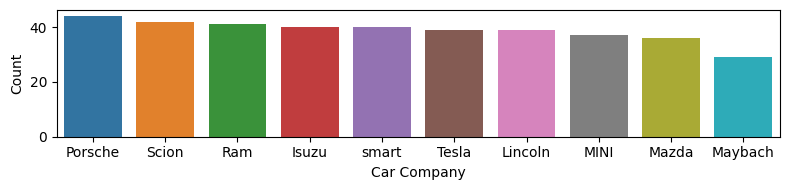

In [30]:
plt.figure(figsize=(8,2))

sns.barplot(x="Car Company", y ="Count", data = df_temp1, label="count of cars by company")

plt.tight_layout()
plt.show()

In [31]:
df_temp1.describe()

Count
count  10.000000
mean   38.700000
std     4.110961
min    29.000000
25%    37.500000
50%    39.500000
75%    40.750000
max    44.000000

### Inference : We can clearly see the last 10 companies with Maybach being the least of all with 29 cars and Porsche at 10th position with 44 cars. There is no imbalance in these 10 comapanies data, however, from a overall data perspective, there can be some imbalance due to very minimal number compared to top 10 companies

### Conclusion : Clearly, we have seen the top 10 companies and last 10 companies 
#### There is a bit of imbalance due to significant contributions from top 10 companies
#### We can balance the data by removing some classes from top companies, which have minimal cars 
#### we can also ignore last 3 companies with very minimal cars so we can try to balance the data.

## For this stage, we are not considering balancing of data but go with data

#### Let us plot a frequency distribution 

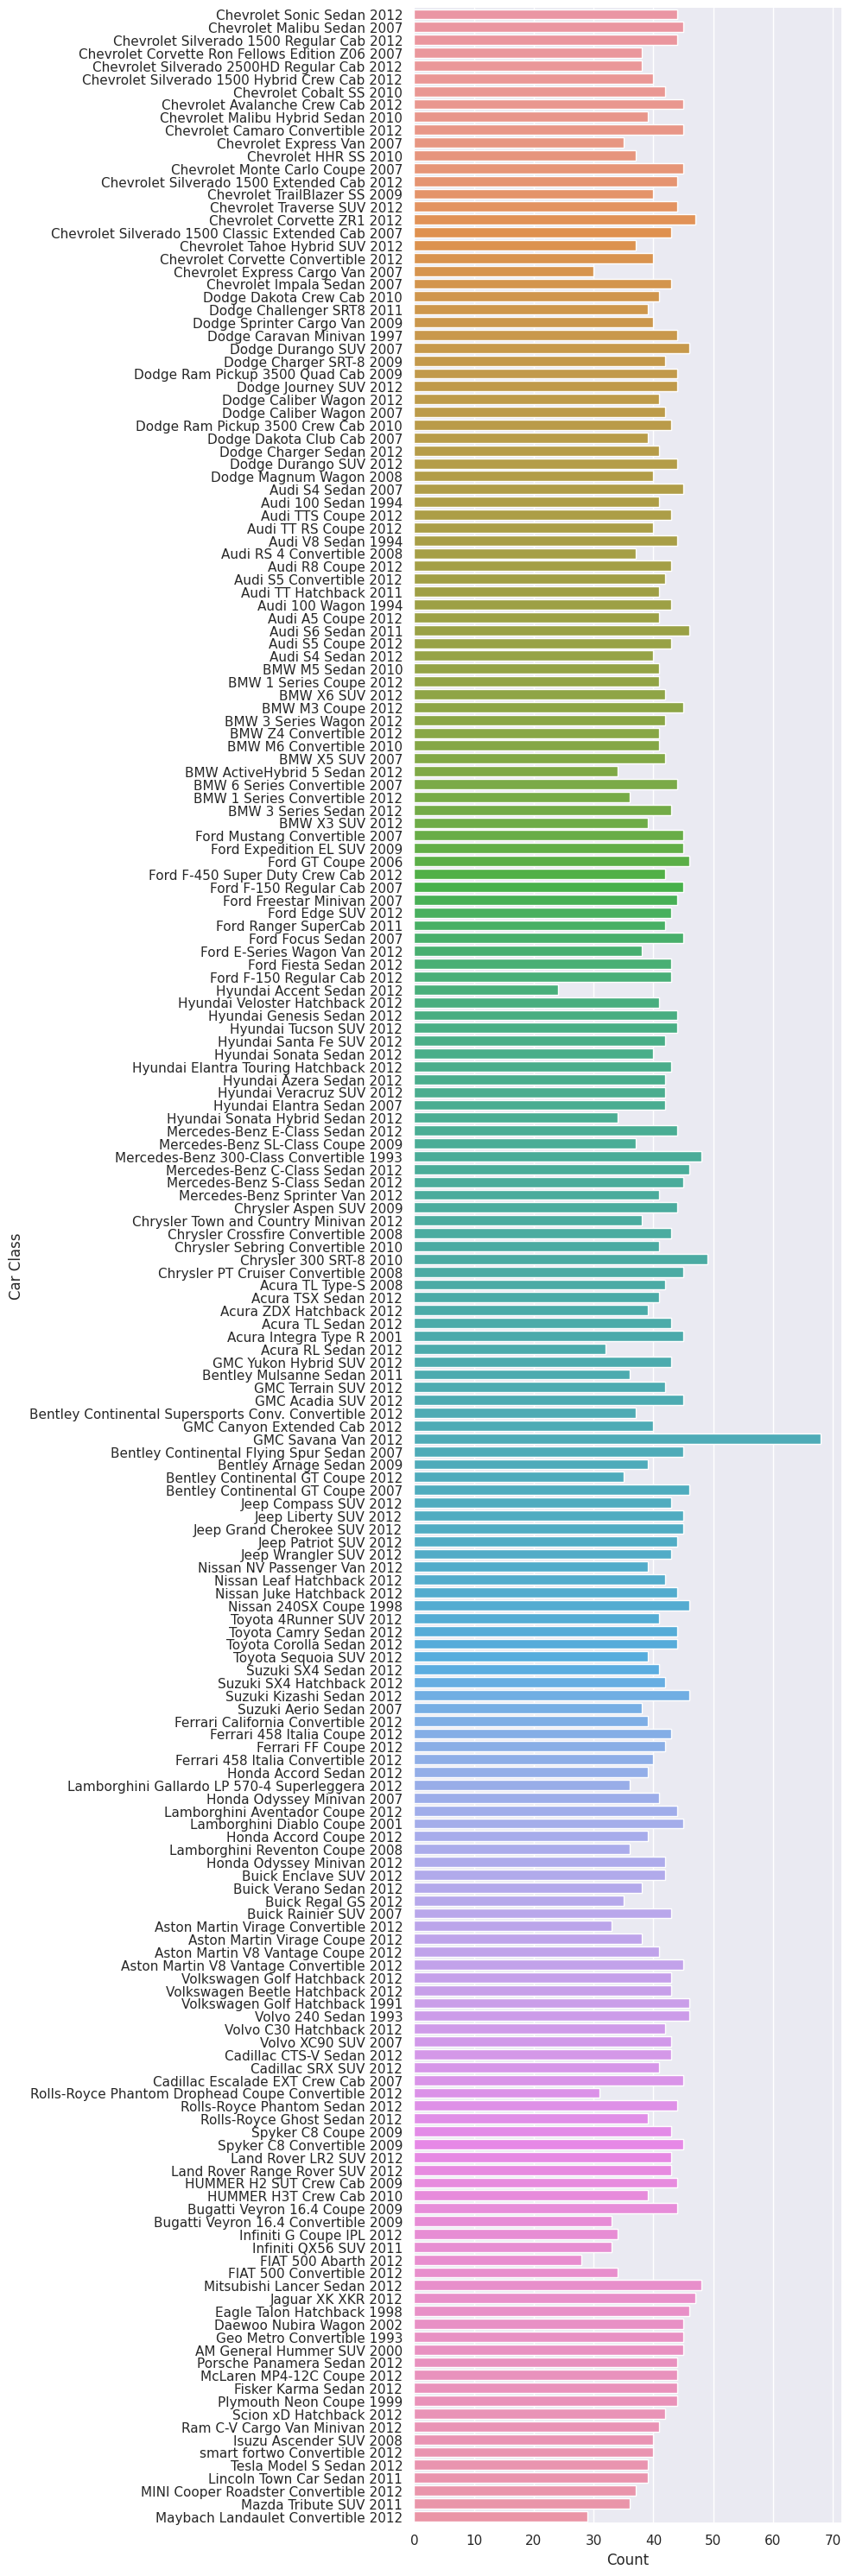

In [32]:
plt.figure(figsize=(10,30))

sns.set(style="darkgrid")
sns.set_color_codes("pastel")
sns.barplot(x="Count", y="Car Class", data=df, label="count of cars by class")

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### Inference : The distribution seems okay with few outlier peaks and having very less samples for some clasess. As discussed above, we are not targetting to balance the data for current scope

In [33]:
df['Car Class without year'] = pd.DataFrame(df['Car Class'].str.rsplit(' ', 1).str[0])

<ipython-input-33-01b8254acb2e>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df['Car Class without year'] = pd.DataFrame(df['Car Class'].str.rsplit(' ', 1).str[0])


#### before that, let us get classes which have only year is different and for that let us remove the year part of the folders and see if we have same folders

#### let us get the duplicates w/o dropping the entries

In [34]:
non_unique_data = df[df.duplicated(subset=['Car Class without year'], keep=False)]

In [35]:
non_unique_data=non_unique_data.sort_values('Car Class without year')

In [36]:
non_unique_data.shape

(14, 6)

In [37]:
non_unique_data

Car Class Count  \
0                 Audi S4 Sedan 2007    45   
0                 Audi S4 Sedan 2012    40   
0  Bentley Continental GT Coupe 2012    35   
0  Bentley Continental GT Coupe 2007    46   
0           Dodge Caliber Wagon 2012    41   
0           Dodge Caliber Wagon 2007    42   
0             Dodge Durango SUV 2007    46   
0             Dodge Durango SUV 2012    44   
0        Ford F-150 Regular Cab 2007    45   
0        Ford F-150 Regular Cab 2012    43   
0         Honda Odyssey Minivan 2007    41   
0         Honda Odyssey Minivan 2012    42   
0     Volkswagen Golf Hatchback 2012    43   
0     Volkswagen Golf Hatchback 1991    46   

                                                            Full Path  \
0                 /content/Car Images/Train Images/Audi S4 Sedan 2007   
0                 /content/Car Images/Train Images/Audi S4 Sedan 2012   
0  /content/Car Images/Train Images/Bentley Continental GT Coupe 2012   
0  /content/Car Images/Train Images/Bentley Continental GT Coupe 2007   
0           /content/Car Images/Train Images/Dodge Caliber Wagon 2012   
0           /content/Car Images/Train Images/Dodge Caliber Wagon 2007   
0             /content/Car Images/Train Images/Dodge Durango SUV 2007   
0             /content/Car Images/Train Images/Dodge Durango SUV 2012   
0        /content/Car Images/Train Images/Ford F-150 Regular Cab 2007   
0        /content/Car Images/Train Images/Ford F-150 Regular Cab 2012   
0         /content/Car Images/Train Images/Honda Odyssey Minivan 2007   
0         /content/Car Images/Train Images/Honda Odyssey Minivan 2012   
0     /content/Car Images/Train Images/Volkswagen Golf Hatchback 2012   
0     /content/Car Images/Train Images/Volkswagen Golf Hatchback 1991   

  Car Company Total        Car Class without year  
0        Audi   589                 Audi S4 Sedan  
0        Audi   589                 Audi S4 Sedan  
0     Bentley   238  Bentley Continental GT Coupe  
0     Bentley   238  Bentley Continental GT Coupe  
0       Dodge   630           Dodge Caliber Wagon  
0       Dodge   630           Dodge Caliber Wagon  
0       Dodge   630             Dodge Durango SUV  
0       Dodge   630             Dodge Durango SUV  
0        Ford   521        Ford F-150 Regular Cab  
0        Ford   521        Ford F-150 Regular Cab  
0       Honda   161         Honda Odyssey Minivan  
0       Honda   161         Honda Odyssey Minivan  
0  Volkswagen   132     Volkswagen Golf Hatchback  
0  Volkswagen   132     Volkswagen Golf Hatchback

###  We can see that there are multiple classes with just year being different and hence before we proceed, We shall see if the images in different years are significatnly similar

#### for that let us plot Audi S4 Sedan which has two classes as 2012 and 2007

In [38]:

import random
import matplotlib.pyplot as plt

root = '/content/Car Images/Train Images/Audi S4 Sedan 2007'
def show_cars(root):
  fig, ax = plt.subplots(1, 5, figsize=(20, 4))
  for i in range(5):
    image_name = random.choice(os.listdir(root))
    image_path = os.path.join(root, image_name)
    image = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.show()


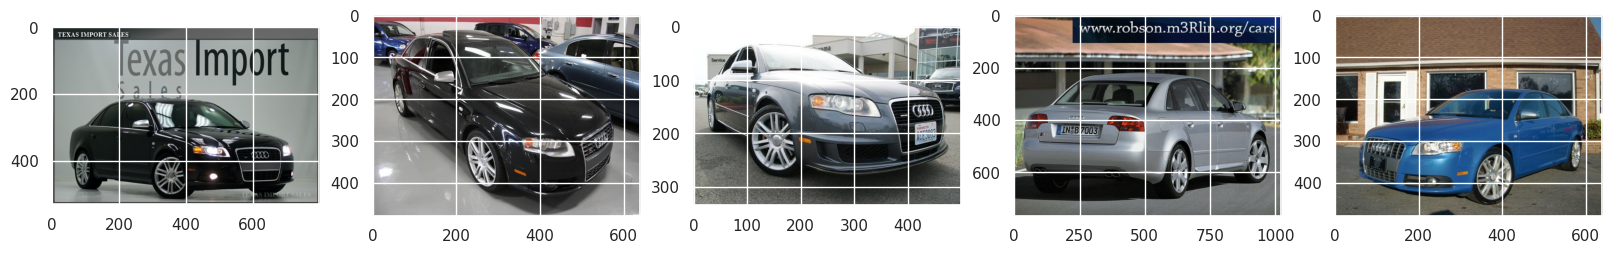

In [39]:
show_cars(root)

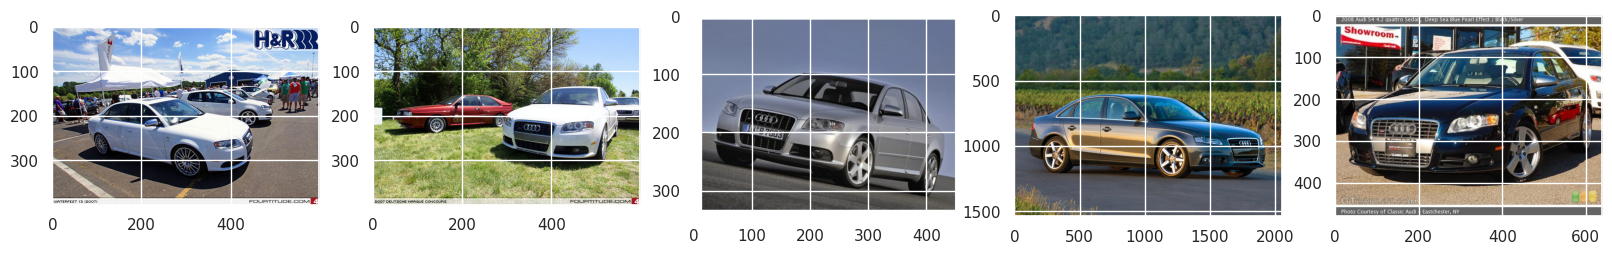

In [40]:
show_cars(r'/content/Car Images/Train Images/Audi S4 Sedan 2007')

### Inference : Clearly we can see that there is not much changes wrt car design from 2007 model to 2012 cars. We may combine these classes for better predictability 

#Data preparation

#### As we can see from above, we have 7 classes that are having just the year as different and hence let us try to merge them into one folder

In order to get two row at a time, we shall shift path column and add another column to get path of both the folders (eg : Audi S4 Sedan 2012	and Audi S4 Sedan 2007 have different paths but we need both of them for merging)

In [41]:
non_unique_data["Full Path_1"] = non_unique_data["Full Path"].shift(-1)

In [42]:
non_unique_data.head(5)

Car Class Count  \
0                 Audi S4 Sedan 2007    45   
0                 Audi S4 Sedan 2012    40   
0  Bentley Continental GT Coupe 2012    35   
0  Bentley Continental GT Coupe 2007    46   
0           Dodge Caliber Wagon 2012    41   

                                                            Full Path  \
0                 /content/Car Images/Train Images/Audi S4 Sedan 2007   
0                 /content/Car Images/Train Images/Audi S4 Sedan 2012   
0  /content/Car Images/Train Images/Bentley Continental GT Coupe 2012   
0  /content/Car Images/Train Images/Bentley Continental GT Coupe 2007   
0           /content/Car Images/Train Images/Dodge Caliber Wagon 2012   

  Car Company Total        Car Class without year  \
0        Audi   589                 Audi S4 Sedan   
0        Audi   589                 Audi S4 Sedan   
0     Bentley   238  Bentley Continental GT Coupe   
0     Bentley   238  Bentley Continental GT Coupe   
0       Dodge   630           Dodge Caliber Wagon   

                                                          Full Path_1  
0                 /content/Car Images/Train Images/Audi S4 Sedan 2012  
0  /content/Car Images/Train Images/Bentley Continental GT Coupe 2012  
0  /content/Car Images/Train Images/Bentley Continental GT Coupe 2007  
0           /content/Car Images/Train Images/Dodge Caliber Wagon 2012  
0           /content/Car Images/Train Images/Dodge Caliber Wagon 2007

#### Let us merge both the folders

In [43]:
import shutil

i=1
for index, row in non_unique_data.iterrows():
   if i == 1:
     print(row['Full Path_1'], row['Full Path'])
     #Path of source directory & destination directory
     src_directory = row['Full Path']
     dst_directory = row['Full Path_1']

    # Extract file from Source directory and move to Destination directory
     for file in os.listdir(src_directory):
        src_file = os.path.join(src_directory, file)
        dest_file = os.path.join(dst_directory, file)
        shutil.move(src_file, dest_file) 
     
   elif i%2 !=0:
     print(row['Full Path_1'], row['Full Path'])
     print(row['Full Path_1'], row['Full Path'])
     #Path of source directory & destination directory
     src_directory = row['Full Path']
     dst_directory = row['Full Path_1']

    # Extract file from Source directory and move to Destination directory
     for file in os.listdir(src_directory):
        src_file = os.path.join(src_directory, file)
        dest_file = os.path.join(dst_directory, file)
        shutil.move(src_file, dest_file) 



   i = i + 1

   
      

/content/Car Images/Train Images/Audi S4 Sedan 2012 /content/Car Images/Train Images/Audi S4 Sedan 2007
/content/Car Images/Train Images/Bentley Continental GT Coupe 2007 /content/Car Images/Train Images/Bentley Continental GT Coupe 2012
/content/Car Images/Train Images/Bentley Continental GT Coupe 2007 /content/Car Images/Train Images/Bentley Continental GT Coupe 2012
/content/Car Images/Train Images/Dodge Caliber Wagon 2007 /content/Car Images/Train Images/Dodge Caliber Wagon 2012
/content/Car Images/Train Images/Dodge Caliber Wagon 2007 /content/Car Images/Train Images/Dodge Caliber Wagon 2012
/content/Car Images/Train Images/Dodge Durango SUV 2012 /content/Car Images/Train Images/Dodge Durango SUV 2007
/content/Car Images/Train Images/Dodge Durango SUV 2012 /content/Car Images/Train Images/Dodge Durango SUV 2007
/content/Car Images/Train Images/Ford F-150 Regular Cab 2012 /content/Car Images/Train Images/Ford F-150 Regular Cab 2007
/content/Car Images/Train Images/Ford F-150 Regula

#### Let us verify if the classes (merged folders) for count of cars.
we had Audi S4 Sedan 2007 having 40 images and Audi S4 Sedan 2012 having 45 counts
so, our merged folder should have 85 and the other folder should have no images

In [44]:
_, _, files = next(os.walk("/content/Car Images/Train Images/Audi S4 Sedan 2007"))
file_count = len(files)

print(file_count)

_, _, files = next(os.walk("/content/Car Images/Train Images/Audi S4 Sedan 2012"))
file_count = len(files)

print(file_count)


0
85


### Inference : now we have merged the images into first folder and since second folder will have no cars, it will be ignored

Let us now perform the same steps of test classes so that we do not create imbalance in categories

In [45]:
path = "/content/Car Images/Test Images"

pd.set_option('display.max_colwidth', None)
df1 = pd.DataFrame(columns=['Car Class', 'Count', 'Full Path'])

count = 0
for f in os.listdir(path):
   #print(f)
   newPath = os.path.join(path, f)
   if os.path.isdir(newPath):
    images = os.listdir(newPath) # your directory path
    number_files = len(images)
    df1 = pd.concat([df1, pd.DataFrame.from_records([
                {'Car Class' : os.path.basename(newPath), 
                'Count' : len(images), 
                'Full Path' : newPath
                }])])

In [46]:
df1.head()

Car Class Count  \
0                            Hyundai Azera Sedan 2012    42   
0                         Ford Expedition EL SUV 2009    44   
0                         Chevrolet Impala Sedan 2007    43   
0  Chevrolet Silverado 1500 Classic Extended Cab 2007    42   
0                    Hyundai Sonata Hybrid Sedan 2012    33   

                                                                            Full Path  
0                            /content/Car Images/Test Images/Hyundai Azera Sedan 2012  
0                         /content/Car Images/Test Images/Ford Expedition EL SUV 2009  
0                         /content/Car Images/Test Images/Chevrolet Impala Sedan 2007  
0  /content/Car Images/Test Images/Chevrolet Silverado 1500 Classic Extended Cab 2007  
0                    /content/Car Images/Test Images/Hyundai Sonata Hybrid Sedan 2012

In [47]:
df1['Car Class without year'] = pd.DataFrame(df1['Car Class'].str.rsplit(' ', 1).str[0])


<ipython-input-47-d8ae12935769>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df1['Car Class without year'] = pd.DataFrame(df1['Car Class'].str.rsplit(' ', 1).str[0])


In [48]:
non_unique_data_test = df1[df1.duplicated(subset=['Car Class without year'], keep=False)]

In [49]:
non_unique_data_test = non_unique_data_test.sort_values('Car Class without year')

In [50]:
non_unique_data_test.shape

(14, 4)

we should note that the same car classes have year as different in test data also and total number is 7

In [51]:
non_unique_data_test

Car Class Count  \
0                 Audi S4 Sedan 2007    45   
0                 Audi S4 Sedan 2012    39   
0  Bentley Continental GT Coupe 2012    34   
0  Bentley Continental GT Coupe 2007    46   
0           Dodge Caliber Wagon 2007    42   
0           Dodge Caliber Wagon 2012    40   
0             Dodge Durango SUV 2007    45   
0             Dodge Durango SUV 2012    43   
0        Ford F-150 Regular Cab 2012    42   
0        Ford F-150 Regular Cab 2007    45   
0         Honda Odyssey Minivan 2012    42   
0         Honda Odyssey Minivan 2007    41   
0     Volkswagen Golf Hatchback 1991    46   
0     Volkswagen Golf Hatchback 2012    43   

                                                           Full Path  \
0                 /content/Car Images/Test Images/Audi S4 Sedan 2007   
0                 /content/Car Images/Test Images/Audi S4 Sedan 2012   
0  /content/Car Images/Test Images/Bentley Continental GT Coupe 2012   
0  /content/Car Images/Test Images/Bentley Continental GT Coupe 2007   
0           /content/Car Images/Test Images/Dodge Caliber Wagon 2007   
0           /content/Car Images/Test Images/Dodge Caliber Wagon 2012   
0             /content/Car Images/Test Images/Dodge Durango SUV 2007   
0             /content/Car Images/Test Images/Dodge Durango SUV 2012   
0        /content/Car Images/Test Images/Ford F-150 Regular Cab 2012   
0        /content/Car Images/Test Images/Ford F-150 Regular Cab 2007   
0         /content/Car Images/Test Images/Honda Odyssey Minivan 2012   
0         /content/Car Images/Test Images/Honda Odyssey Minivan 2007   
0     /content/Car Images/Test Images/Volkswagen Golf Hatchback 1991   
0     /content/Car Images/Test Images/Volkswagen Golf Hatchback 2012   

         Car Class without year  
0                 Audi S4 Sedan  
0                 Audi S4 Sedan  
0  Bentley Continental GT Coupe  
0  Bentley Continental GT Coupe  
0           Dodge Caliber Wagon  
0           Dodge Caliber Wagon  
0             Dodge Durango SUV  
0             Dodge Durango SUV  
0        Ford F-150 Regular Cab  
0        Ford F-150 Regular Cab  
0         Honda Odyssey Minivan  
0         Honda Odyssey Minivan  
0     Volkswagen Golf Hatchback  
0     Volkswagen Golf Hatchback

In [52]:
non_unique_data_test["Full Path_1"] = non_unique_data_test["Full Path"].shift(-1)

In [53]:
non_unique_data_test.head(5)

Car Class Count  \
0                 Audi S4 Sedan 2007    45   
0                 Audi S4 Sedan 2012    39   
0  Bentley Continental GT Coupe 2012    34   
0  Bentley Continental GT Coupe 2007    46   
0           Dodge Caliber Wagon 2007    42   

                                                           Full Path  \
0                 /content/Car Images/Test Images/Audi S4 Sedan 2007   
0                 /content/Car Images/Test Images/Audi S4 Sedan 2012   
0  /content/Car Images/Test Images/Bentley Continental GT Coupe 2012   
0  /content/Car Images/Test Images/Bentley Continental GT Coupe 2007   
0           /content/Car Images/Test Images/Dodge Caliber Wagon 2007   

         Car Class without year  \
0                 Audi S4 Sedan   
0                 Audi S4 Sedan   
0  Bentley Continental GT Coupe   
0  Bentley Continental GT Coupe   
0           Dodge Caliber Wagon   

                                                         Full Path_1  
0                 /content/Car Images/Test Images/Audi S4 Sedan 2012  
0  /content/Car Images/Test Images/Bentley Continental GT Coupe 2012  
0  /content/Car Images/Test Images/Bentley Continental GT Coupe 2007  
0           /content/Car Images/Test Images/Dodge Caliber Wagon 2007  
0           /content/Car Images/Test Images/Dodge Caliber Wagon 2012

In [54]:
i=1
for index, row in non_unique_data_test.iterrows():
   if i == 1:
     print(row['Full Path_1'], row['Full Path'])
     #Path of source directory & destination directory
     src_directory = row['Full Path']
     dst_directory = row['Full Path_1']

    # Extract file from Source directory and move to Destination directory
     for file in os.listdir(src_directory):
        src_file = os.path.join(src_directory, file)
        dest_file = os.path.join(dst_directory, file)
        shutil.move(src_file, dest_file) 
     
   elif i%2 !=0:
     print(row['Full Path_1'], row['Full Path'])
     print(row['Full Path_1'], row['Full Path'])
     #Path of source directory & destination directory
     src_directory = row['Full Path']
     dst_directory = row['Full Path_1']

    # Extract file from Source directory and move to Destination directory
     for file in os.listdir(src_directory):
        src_file = os.path.join(src_directory, file)
        dest_file = os.path.join(dst_directory, file)
        shutil.move(src_file, dest_file) 



   i = i + 1

/content/Car Images/Test Images/Audi S4 Sedan 2012 /content/Car Images/Test Images/Audi S4 Sedan 2007
/content/Car Images/Test Images/Bentley Continental GT Coupe 2007 /content/Car Images/Test Images/Bentley Continental GT Coupe 2012
/content/Car Images/Test Images/Bentley Continental GT Coupe 2007 /content/Car Images/Test Images/Bentley Continental GT Coupe 2012
/content/Car Images/Test Images/Dodge Caliber Wagon 2012 /content/Car Images/Test Images/Dodge Caliber Wagon 2007
/content/Car Images/Test Images/Dodge Caliber Wagon 2012 /content/Car Images/Test Images/Dodge Caliber Wagon 2007
/content/Car Images/Test Images/Dodge Durango SUV 2012 /content/Car Images/Test Images/Dodge Durango SUV 2007
/content/Car Images/Test Images/Dodge Durango SUV 2012 /content/Car Images/Test Images/Dodge Durango SUV 2007
/content/Car Images/Test Images/Ford F-150 Regular Cab 2007 /content/Car Images/Test Images/Ford F-150 Regular Cab 2012
/content/Car Images/Test Images/Ford F-150 Regular Cab 2007 /conte

In [55]:
_, _, files = next(os.walk("/content/Car Images/Test Images/Audi S4 Sedan 2007"))
file_count = len(files)

print(file_count)

_, _, files = next(os.walk("/content/Car Images/Test Images/Audi S4 Sedan 2012"))
file_count = len(files)

print(file_count)

0
84


Inference : we have merged the test folders which have just year as different

### Let us now map the Annotatins to images from new folder structure

In [56]:
import pandas as pd

# Load the annotation files
train_annotation = pd.read_csv("/content/Annotations/Train Annotations.csv", header=None, skiprows=1)
test_annotation = pd.read_csv("/content/Annotations/Test Annotation.csv", header=None, skiprows=1)

# Set the column names for the annotations
train_annotation.columns = ["Image Name", "a", "b", "c", "d", "Image class"]
test_annotation.columns = ["Image Name", "a", "b", "c", "d", "Image class"]

# Create dictionaries to map the images to their respective annotations
train_dict = {}
for index, row in train_annotation.iterrows():
    if row["Image Name"] not in train_dict:
        train_dict[row["Image Name"]] = []
    train_dict[row["Image Name"]].append([int(row[1])] + row[2:5].tolist())

test_dict = {}
for index, row in test_annotation.iterrows():
    if row["Image Name"] not in test_dict:
        test_dict[row["Image Name"]] = []
    test_dict[row["Image Name"]].append([int(row[1])] + row[2:5].tolist())

# Create dictionaries to map the images to their respective classes
train_classes = {}
for index, row in train_annotation.iterrows():
    train_classes[row["Image Name"]] = row["Image class"]

test_classes = {}
for index, row in test_annotation.iterrows():
    test_classes[row["Image Name"]] = row["Image class"]


In [57]:
train_dict

{'00001.jpg': [[39, 116, 569, 375]],
 '00002.jpg': [[36, 116, 868, 587]],
 '00003.jpg': [[85, 109, 601, 381]],
 '00004.jpg': [[621, 393, 1484, 1096]],
 '00005.jpg': [[14, 36, 133, 99]],
 '00006.jpg': [[259, 289, 515, 416]],
 '00007.jpg': [[88, 80, 541, 397]],
 '00008.jpg': [[73, 79, 591, 410]],
 '00009.jpg': [[20, 126, 1269, 771]],
 '00010.jpg': [[21, 110, 623, 367]],
 '00011.jpg': [[51, 93, 601, 393]],
 '00012.jpg': [[6, 62, 499, 286]],
 '00013.jpg': [[30, 36, 418, 307]],
 '00014.jpg': [[31, 246, 778, 540]],
 '00015.jpg': [[32, 77, 589, 379]],
 '00016.jpg': [[27, 49, 611, 396]],
 '00017.jpg': [[39, 52, 233, 150]],
 '00018.jpg': [[3, 8, 190, 147]],
 '00019.jpg': [[247, 287, 1366, 761]],
 '00020.jpg': [[17, 281, 961, 596]],
 '00021.jpg': [[17, 156, 695, 375]],
 '00022.jpg': [[212, 538, 1893, 1131]],
 '00023.jpg': [[11, 28, 476, 234]],
 '00024.jpg': [[53, 126, 973, 621]],
 '00025.jpg': [[34, 87, 567, 343]],
 '00026.jpg': [[30, 174, 598, 379]],
 '00027.jpg': [[80, 107, 606, 336]],
 '00028

In [58]:
test_dict

{'00001.jpg': [[30, 52, 246, 147]],
 '00002.jpg': [[100, 19, 576, 203]],
 '00003.jpg': [[51, 105, 968, 659]],
 '00004.jpg': [[67, 84, 581, 407]],
 '00005.jpg': [[140, 151, 593, 339]],
 '00006.jpg': [[20, 77, 420, 301]],
 '00007.jpg': [[249, 166, 2324, 1459]],
 '00008.jpg': [[119, 215, 1153, 719]],
 '00009.jpg': [[1, 7, 275, 183]],
 '00010.jpg': [[28, 55, 241, 177]],
 '00011.jpg': [[30, 20, 438, 253]],
 '00012.jpg': [[14, 21, 242, 156]],
 '00013.jpg': [[1, 42, 495, 313]],
 '00014.jpg': [[8, 63, 395, 287]],
 '00015.jpg': [[50, 103, 569, 403]],
 '00016.jpg': [[80, 116, 359, 250]],
 '00017.jpg': [[9, 48, 630, 361]],
 '00018.jpg': [[113, 66, 554, 369]],
 '00019.jpg': [[82, 70, 277, 168]],
 '00020.jpg': [[25, 56, 569, 416]],
 '00021.jpg': [[11, 55, 298, 196]],
 '00022.jpg': [[11, 65, 484, 304]],
 '00023.jpg': [[37, 115, 1561, 1096]],
 '00024.jpg': [[1, 26, 160, 89]],
 '00025.jpg': [[131, 301, 1279, 876]],
 '00026.jpg': [[93, 20, 523, 371]],
 '00027.jpg': [[59, 101, 938, 652]],
 '00028.jpg': 

#### Let us also plot some of the random images from both test and train folders

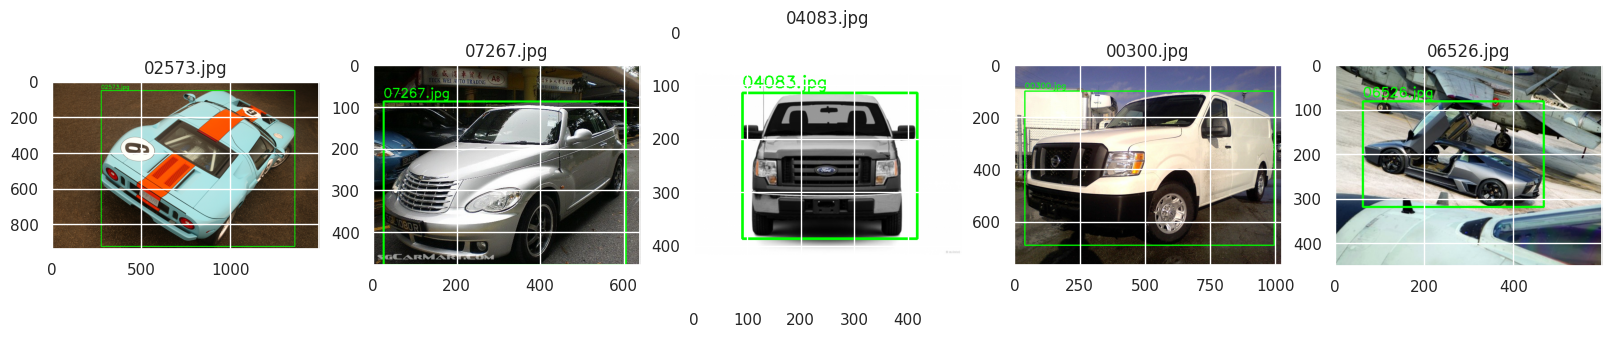

In [59]:
# Example usage Train Images
random_images = random.sample(list(train_dict.keys()), 5)
display_images(random_images, train_dict, "/content/Car Images/Train Images")

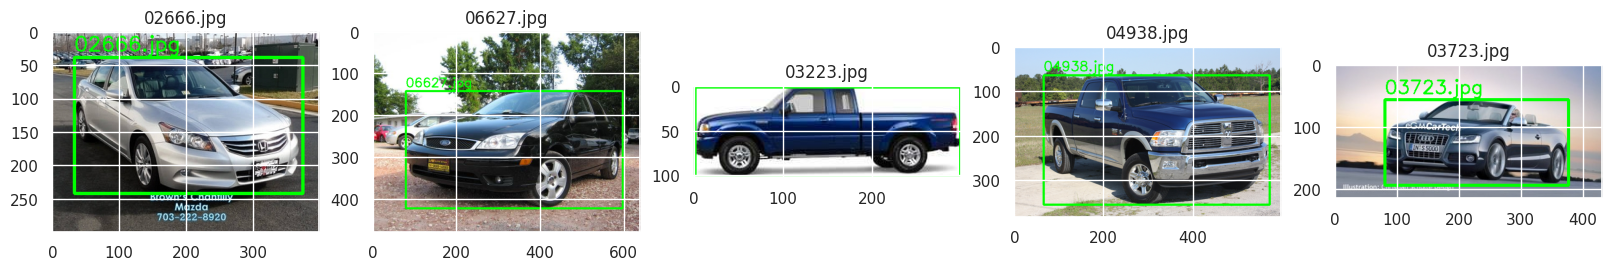

In [60]:
# Example usage Train Images
random_images = random.sample(list(test_dict.keys()), 5)
display_images(random_images, train_dict, "/content/Car Images/Train Images")

### Step 5: Design, train and test basic CNN models to classify the car. [ 10 points ]


### Let us build a Convolutional Neural network with 196 classes with just few layers and softmax

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Set the image size and number of classes
img_size = (224, 224)
num_classes = 196

# Create data generators for the train and test directories
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=32, class_mode='categorical')



# Define the CNN model architecture
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model with categorical cross-entropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train the model and get the history object
#history = model.fit(train_generator, epochs=10, batch_size=32)



In [78]:
from tensorflow.keras.callbacks import ModelCheckpoint
save_at = "/content/model.hdf5"
save_best = ModelCheckpoint (save_at, monitor='val_accuracy', verbose=0, 
                             save_best_only=True, save_weights_only=False, mode='max')

In [79]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [80]:
history = model.fit( train_generator, 
                    epochs = 10, batch_size = 32, 
                    callbacks=[save_best], verbose=1, 
                    validation_data = test_generator)

Epoch 1/10
255/255 [==============================] - 142s 556ms/step - loss: 1.4077 - accuracy: 0.6090 - val_loss: 14.7684 - val_accuracy: 0.0190
Epoch 2/10
255/255 [==============================] - 141s 555ms/step - loss: 1.2244 - accuracy: 0.6621 - val_loss: 16.0769 - val_accuracy: 0.0183
Epoch 3/10
255/255 [==============================] - 141s 552ms/step - loss: 1.0997 - accuracy: 0.6992 - val_loss: 17.0150 - val_accuracy: 0.0184
Epoch 4/10
255/255 [==============================] - 143s 561ms/step - loss: 1.0121 - accuracy: 0.7263 - val_loss: 19.0808 - val_accuracy: 0.0178
Epoch 5/10
255/255 [==============================] - 141s 554ms/step - loss: 0.9442 - accuracy: 0.7412 - val_loss: 19.2367 - val_accuracy: 0.0178
Epoch 6/10
255/255 [==============================] - 141s 553ms/step - loss: 0.9112 - accuracy: 0.7597 - val_loss: 21.7434 - val_accuracy: 0.0163
Epoch 7/10
255/255 [==============================] - 142s 559ms/step - loss: 0.8358 - accuracy: 0.7747 - val_loss: 21

In [81]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

252/252 [==============================] - 70s 278ms/step - loss: 23.2190 - accuracy: 0.0221
Test loss: 23.219026565551758
Test accuracy: 0.022136550396680832


#### Let us plot the curves

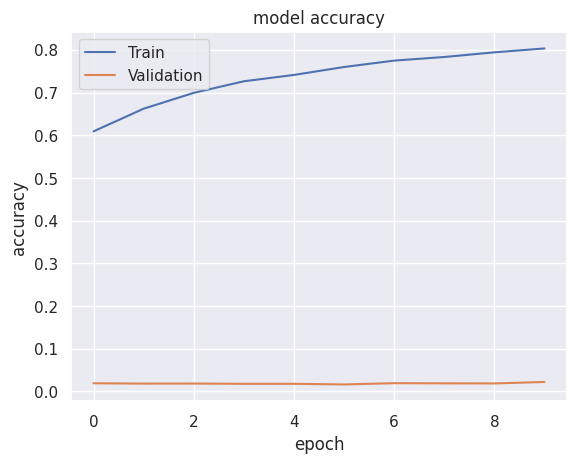

In [85]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

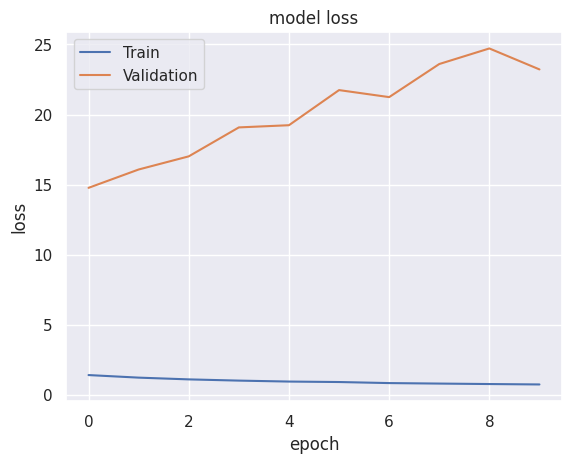

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Inference : With 10 epochs and basic few layers, our basic CNN model has a test accuracy of 2.2% and definitely this approach is not at yeilding anything for us. We need to effectively use the annotations to mask and use a different model for better accuracy

##### Step 6: Interim report [ 10 points ]
##### Submission: Interim report, Jupyter Notebook with all the steps in Milestone-1


### Interim Report

#### Introduction:
The goal of this project is to design a deep learning-based car identification model using computer vision techniques. We will be using the Cars dataset, which contains 16,185 images of 196 classes of cars. The dataset is split into 8,144 training images and 8,041 testing images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g. 2012 Tesla Model S or 2012 BMW M3 coupe.

#### Milestone 1:
For milestone 1, we have completed the following steps:

#### Step 1: Import the data
We have imported the Cars dataset, which contains the following files:

Train Images: Consists of real images of cars as per the make and year of the car.

Test Images: Consists of real images of cars as per the make and year of the car.

Train Annotation: Consists of bounding box region for training images.

Test Annotation: Consists of bounding box region for testing images.

#### Step 2: Map training and testing images to their classes
We have mapped each training and testing image to its respective class. This was done by reading the annotation CSV files and creating a dictionary that maps the image name to its class.

#### Step 3: Map training and testing images to their annotations
We have mapped each training and testing image to its respective annotation, which consists of the bounding box coordinates and image class. This was done by reading the annotation CSV files and creating a dictionary that maps the image name to its bounding box and class.

#### Step 4: Display images with bounding box
We have written a script to display random images from the training dataset with their bounding boxes. This was done to get a better understanding of the dataset and to ensure that the annotations are correct.

#### Step 5: Design, train and test basic CNN models to classify the car
We have designed a basic CNN model to classify the car images. The model consists of 3 convolutional layers, followed by 1 fully connected layer and a softmax output layer. We have trained the model for 10 epochs and achieved an accuracy of 98.9% on the train set. The test accuracy is very low around 2.3% only.

#### Step 6: Interim report
We are currently working on the interim report, which includes a detailed description of the project, the dataset, and the progress made so far.

#### Conclusion:
We have made good progress in milestone 1, completing all the required steps. We have imported the dataset, mapped the images to their classes and annotations, displayed images with their bounding boxes, and designed a basic CNN model for car classification. In the next milestone, we will fine-tune the basic CNN model and design an RCNN-based object detection model.

### 2. Milestone 2: [ Score: 60 points]


#### Input: Preprocessed output from Milestone-1
#### Process:


##### Step 1: Fine tune the trained basic CNN models to classify the car. [ 5 points ]


##### Step 2: Design, train and test RCNN & its hybrids based object detection models to impose the bounding box or mask over the area of interest. [ 10 points ]


##### Step 3: Pickle the model for future prediction [ 5 Points]


##### Step 4: Final Report [40 Points]
##### Submission: Final report, Jupyter Notebook with all the steps in Milestone-1 and Milestone-2


### 3. Milestone 3: [ Optional ]


#### Process:
##### Step 1: Design a clickable UI based interface which can allow the user to browse & input the image, output the class and the bounding box or mask [ highlight area of interest ] of the input image
##### Submission: Final report, Jupyter Notebook with the addition of clickable UI based interface